# **Task 1:- Big Data Analysis Using PySpark.**

In [ ]:
#  Install PySpark
!pip install pyspark

In [ ]:
#  Import Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#  Import Required Libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, avg, max, min, mean
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

In [ ]:
#  Create a Spark Session
spark = SparkSession.builder \
    .appName("Credit Card Data Analysis") \
    .getOrCreate()

In [ ]:
#  Set file path to the uploaded file

data_path = "/content/credit card.csv"  # Make sure the filename matches exactly

In [ ]:
#  Load the CSV into a PySpark DataFrame
df = spark.read.csv(data_path, header=True, inferSchema=True)

In [ ]:
#  Show the first 5 rows to get a glimpse of the data
df.show(5)

+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+--------------+---------------+------+
|RowNumber|CustomerId| Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+--------------+---------------+------+
|        1|  15634602|Hargrave|        619|   France|Female| 42|     2|      0.0|            1|             1|      101348.88|     1|
|        2|  15647311|    Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|             1|      112542.58|     0|
|        3|  15619304|    Onio|        502|   France|Female| 42|     8| 159660.8|            3|             0|      113931.57|     1|
|        4|  15701354|    Boni|        699|   France|Female| 39|     1|      0.0|            2|             0|       93826.63|     0|
|        5|  15737888|Mitchell|        850|    Spain|Female| 4

In [ ]:
len(df.columns)

13

In [ ]:
#  Total Number of Records
print(f" Total Records in Dataset: {df.count()}")

 Total Records in Dataset: 10000


In [ ]:
#  Get column names
columns = df.columns

#  Print column names
print(columns)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [ ]:
#  Display the schema (column names and data types)
df.printSchema()

root
 |-- RowNumber: integer (nullable = true)
 |-- CustomerId: integer (nullable = true)
 |-- Surname: string (nullable = true)
 |-- CreditScore: integer (nullable = true)
 |-- Geography: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- Balance: double (nullable = true)
 |-- NumOfProducts: integer (nullable = true)
 |-- IsActiveMember: integer (nullable = true)
 |-- EstimatedSalary: double (nullable = true)
 |-- Exited: integer (nullable = true)



In [ ]:
#  Count total records in the dataset
print(" Total records:", df.count())

 Total records: 10000


In [ ]:
# Summary statistics for numerical columns
print(" Summary Statistics:")
df.describe().show()

 Summary Statistics:
+-------+------------------+-----------------+-------+-----------------+---------+------+------------------+------------------+-----------------+------------------+-------------------+-----------------+-------------------+
|summary|         RowNumber|       CustomerId|Surname|      CreditScore|Geography|Gender|               Age|            Tenure|          Balance|     NumOfProducts|     IsActiveMember|  EstimatedSalary|             Exited|
+-------+------------------+-----------------+-------+-----------------+---------+------+------------------+------------------+-----------------+------------------+-------------------+-----------------+-------------------+
|  count|             10000|            10000|  10000|            10000|    10000| 10000|             10000|             10000|            10000|             10000|              10000|            10000|              10000|
|   mean|            5000.5|  1.56909405694E7|   NULL|         650.5288|     NULL|  NUL

In [ ]:
# Check for null values in each column
print(" Null value count per column:")
df.select([count(col(c)).alias(c) for c in df.columns]).show()

 Null value count per column:
+---------+----------+-------+-----------+---------+------+-----+------+-------+-------------+--------------+---------------+------+
|RowNumber|CustomerId|Surname|CreditScore|Geography|Gender|  Age|Tenure|Balance|NumOfProducts|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+-------+-----------+---------+------+-----+------+-------+-------------+--------------+---------------+------+
|    10000|     10000|  10000|      10000|    10000| 10000|10000| 10000|  10000|        10000|         10000|          10000| 10000|
+---------+----------+-------+-----------+---------+------+-----+------+-------+-------------+--------------+---------------+------+



In [ ]:
# Top 5 users with highest estimated salary
print(" Top 5 highest Estimated Salaries:")
df.select("CustomerId","EstimatedSalary").orderBy(col("EstimatedSalary").desc()).show(10)

 Top 5 highest Estimated Salaries:
+----------+---------------+
|CustomerId|EstimatedSalary|
+----------+---------------+
|  15662021|      199992.48|
|  15634359|      199970.74|
|  15697270|      199953.33|
|  15762331|      199929.17|
|  15709136|      199909.32|
|  15741719|      199862.75|
|  15682834|      199857.47|
|  15804211|      199841.32|
|  15815656|       199808.1|
|  15687913|      199805.63|
+----------+---------------+
only showing top 10 rows



In [ ]:
# Top 5 Customers with Highest Balance
print("\n Top 5 Customers with Highest Balance:")
df.select("CustomerId", "Balance").orderBy(col("Balance").desc()).show(10)



 Top 5 Customers with Highest Balance:
+----------+---------+
|CustomerId|  Balance|
+----------+---------+
|  15757408|250898.09|
|  15715622|238387.56|
|  15714241|222267.63|
|  15571958| 221532.8|
|  15586674|216109.88|
|  15599131|214346.96|
|  15594408| 213146.2|
|  15769818| 212778.2|
|  15620268|212696.32|
|  15780212|212692.97|
+----------+---------+
only showing top 10 rows



In [ ]:
# Average Credit Score
print("\n Average Credit Score:")
df.select("CreditScore").groupBy().avg().show()


 Average Credit Score:
+----------------+
|avg(CreditScore)|
+----------------+
|        650.5288|
+----------------+



In [ ]:
# Number of members eligible for credit card (Credit Score > 700)
print("\n Number of Members Eligible for Credit Card (Credit Score > 700):")
eligible_credit_card = df.filter(df["CreditScore"] > 700).count()
print(f"Eligible Members: {eligible_credit_card}")



 Number of Members Eligible for Credit Card (Credit Score > 700):
Eligible Members: 3116


In [ ]:
# Number of Customers by Geography
print("\n Number of Customers by Geography:")
df.groupBy("Geography").count().orderBy(col("count").desc()).show()


 Number of Customers by Geography:
+---------+-----+
|Geography|count|
+---------+-----+
|   France| 5014|
|  Germany| 2509|
|    Spain| 2477|
+---------+-----+



In [ ]:
# Credit Card Users in Spain
print("\n Credit Card Users from Spain:")
df.filter(df["Geography"] == "Spain").show(10)


 Credit Card Users from Spain:
+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+--------------+---------------+------+
|RowNumber|CustomerId|  Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+--------------+---------------+------+
|        2|  15647311|     Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|             1|      112542.58|     0|
|        5|  15737888| Mitchell|        850|    Spain|Female| 43|     2|125510.82|            1|             1|        79084.1|     0|
|        6|  15574012|      Chu|        645|    Spain|  Male| 44|     8|113755.78|            2|             0|      149756.71|     1|
|       12|  15737173|  Andrews|        497|    Spain|  Male| 24|     3|      0.0|            2|             0|       76390.01|     0|
|       15|  15600882| 

In [ ]:
# Credit Card Users in France
print("\n Credit Card Users from France:")
df.filter(df["Geography"] == "France").show(10)


 Credit Card Users from France:
+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+--------------+---------------+------+
|RowNumber|CustomerId| Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+--------------+---------------+------+
|        1|  15634602|Hargrave|        619|   France|Female| 42|     2|      0.0|            1|             1|      101348.88|     1|
|        3|  15619304|    Onio|        502|   France|Female| 42|     8| 159660.8|            3|             0|      113931.57|     1|
|        4|  15701354|    Boni|        699|   France|Female| 39|     1|      0.0|            2|             0|       93826.63|     0|
|        7|  15592531|Bartlett|        822|   France|  Male| 50|     7|      0.0|            2|             1|        10062.8|     0|
|        9|  15792365|      H

In [ ]:
# Credit Card Users in Spain
print("\n Credit Card Users from Germany:")
df.filter(df["Geography"] == "Germany").show(10)


 Credit Card Users from Germany:
+---------+----------+----------+-----------+---------+------+---+------+---------+-------------+--------------+---------------+------+
|RowNumber|CustomerId|   Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+----------+-----------+---------+------+---+------+---------+-------------+--------------+---------------+------+
|        8|  15656148|    Obinna|        376|  Germany|Female| 29|     4|115046.74|            4|             0|      119346.88|     1|
|       16|  15643966|   Goforth|        616|  Germany|  Male| 45|     3|143129.41|            2|             1|       64327.26|     0|
|       17|  15737452|     Romeo|        653|  Germany|  Male| 58|     1|132602.88|            1|             0|        5097.67|     1|
|       27|  15736816|     Young|        756|  Germany|  Male| 36|     2|136815.64|            1|             1|      170041.95|     0|
|       29|  1

In [ ]:
print("\n Gender Distribution:")
df.groupBy("Gender").count().show()


 Gender Distribution:
+------+-----+
|Gender|count|
+------+-----+
|Female| 4543|
|  Male| 5457|
+------+-----+



In [ ]:
# Average Estimated Salary
print("\n Average Estimated Salary:")
df.select("EstimatedSalary").groupBy().avg().show()


 Average Estimated Salary:
+--------------------+
|avg(EstimatedSalary)|
+--------------------+
|   100090.2398809998|
+--------------------+



In [ ]:
# Eligible and Active Members
print("\n Number of Eligible and Active Members (Credit Score > 700 & Active Member):")
eligible_active_members = df.filter((df["IsActiveMember"] == 1) & (df["CreditScore"] > 700)).count()
print(f"Eligible & Active Members: {eligible_active_members}")


 Number of Eligible and Active Members (Credit Score > 700 & Active Member):
Eligible & Active Members: 1637


In [ ]:
# Churn Rate (Exited Customers)
print("\n Churn Rate (Exited Customers):")
df.groupBy("Exited").count().show()


 Churn Rate (Exited Customers):
+------+-----+
|Exited|count|
+------+-----+
|     1| 2037|
|     0| 7963|
+------+-----+



In [ ]:
# High Salary Members who Exited
print("\n Number of Members with Salary > 100K who Exited:")
high_salary_exited = df.filter((df["EstimatedSalary"] > 100000) & (df["Exited"] == 1)).count()
print(f"High Salary Members who Exited: {high_salary_exited}")


 Number of Members with Salary > 100K who Exited:
High Salary Members who Exited: 1044


In [ ]:
#  Members with Low Salary but More Products
print("\n Number of Members with Salary < 100K and More Than 1 Product:")
low_salary_multi_products = df.filter((df["EstimatedSalary"] < 100000) & (df["NumOfProducts"] > 1)).count()
print(f"Low Salary Members with >1 Products: {low_salary_multi_products}")


 Number of Members with Salary < 100K and More Than 1 Product:
Low Salary Members with >1 Products: 2432


In [ ]:
# Correlation Analysis: Check relationships between numerical columns

# Select numerical columns you want to check correlation between
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']

# Assemble the numeric columns into a single vector column called "features"
vec_assembler = VectorAssembler(inputCols=numeric_cols, outputCol="features")
df_vector = vec_assembler.transform(df.select(numeric_cols)).select("features")

# Calculate the Pearson correlation matrix
correlation_matrix = Correlation.corr(df_vector, "features").head()[0]

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
 DenseMatrix([[ 1.00000000e+00, -3.96490553e-03,  8.41941819e-04,
               6.26838162e-03,  1.22378793e-02, -1.38429287e-03,
              -2.70935398e-02],
             [-3.96490553e-03,  1.00000000e+00, -9.99682559e-03,
               2.83083683e-02, -3.06800880e-02, -7.20104238e-03,
               2.85323038e-01],
             [ 8.41941819e-04, -9.99682559e-03,  1.00000000e+00,
              -1.22539262e-02,  1.34437555e-02,  7.78382546e-03,
              -1.40006123e-02],
             [ 6.26838162e-03,  2.83083683e-02, -1.22539262e-02,
               1.00000000e+00, -3.04179738e-01,  1.27974963e-02,
               1.18532769e-01],
             [ 1.22378793e-02, -3.06800880e-02,  1.34437555e-02,
              -3.04179738e-01,  1.00000000e+00,  1.42041951e-02,
              -4.78198649e-02],
             [-1.38429287e-03, -7.20104238e-03,  7.78382546e-03,
               1.27974963e-02,  1.42041951e-02,  1.00000000e+00,
               1.20968610e-02],
       

In [ ]:
# ---------------------------------------------
# Retention Strategy Insights:
# Average stats for customers who stayed vs who exited
# ---------------------------------------------

# Group data by 'Exited' column
# 0 = Stayed, 1 = Exited
# Calculate average Age, Balance, NumOfProducts, and Tenure for each group
df.groupBy("Exited").agg(
    avg("Age").alias("Average_Age"),
    avg("Balance").alias("Average_Balance"),
    avg("NumOfProducts").alias("Average_NumOfProducts"),
    avg("Tenure").alias("Average_Tenure")
).show()


+------+-----------------+-----------------+---------------------+-----------------+
|Exited|      Average_Age|  Average_Balance|Average_NumOfProducts|   Average_Tenure|
+------+-----------------+-----------------+---------------------+-----------------+
|     1| 44.8379970544919|91108.53933726063|   1.4752086401570939|4.932744231713304|
|     0|37.40838879819164|72745.29677885193|   1.5442672359663443|5.033278914981791|
+------+-----------------+-----------------+---------------------+-----------------+



In [ ]:
# ---------------------------------------------
# Geography vs Churn:
# How many people exited/stayed in each country
# ---------------------------------------------

# Group by Geography and Exited
# Count the number of customers for each combination
df.groupBy("Geography", "Exited").count().orderBy("Geography", "Exited").show()


+---------+------+-----+
|Geography|Exited|count|
+---------+------+-----+
|   France|     0| 4204|
|   France|     1|  810|
|  Germany|     0| 1695|
|  Germany|     1|  814|
|    Spain|     0| 2064|
|    Spain|     1|  413|
+---------+------+-----+



In [ ]:
# ---------------------------------------------
# Gender vs Churn:
# Compare churn rates between males and females
# ---------------------------------------------

# Group by Gender and Exited
# Count the number of customers for each combination
df.groupBy("Gender", "Exited").count().orderBy("Gender", "Exited").show()


+------+------+-----+
|Gender|Exited|count|
+------+------+-----+
|Female|     0| 3404|
|Female|     1| 1139|
|  Male|     0| 4559|
|  Male|     1|  898|
+------+------+-----+



In [ ]:
# ---------------------------------------------
# Bucketization: Group customers by Age ranges
# ---------------------------------------------

# Import Bucketizer for creating bins
from pyspark.ml.feature import Bucketizer

# Define custom age splits:
# 0-30 years -> Bucket 0
# 30-40 years -> Bucket 1
# 40-50 years -> Bucket 2
# 50-60 years -> Bucket 3
# 60+ years -> Bucket 4
splits = [0, 30, 40, 50, 60, float("inf")]

# Create a Bucketizer
bucketizer = Bucketizer(splits=splits, inputCol="Age", outputCol="AgeGroup")

# Apply the Bucketizer to the dataset
bucketed_df = bucketizer.transform(df)

# Now group by AgeGroup and Exited to see churn rate for each age group
bucketed_df.groupBy("AgeGroup", "Exited").count().orderBy("AgeGroup", "Exited").show()


+--------+------+-----+
|AgeGroup|Exited|count|
+--------+------+-----+
|     0.0|     0| 1517|
|     0.0|     1|  124|
|     1.0|     0| 3873|
|     1.0|     1|  473|
|     2.0|     0| 1812|
|     2.0|     1|  806|
|     3.0|     0|  382|
|     3.0|     1|  487|
|     4.0|     0|  379|
|     4.0|     1|  147|
+--------+------+-----+



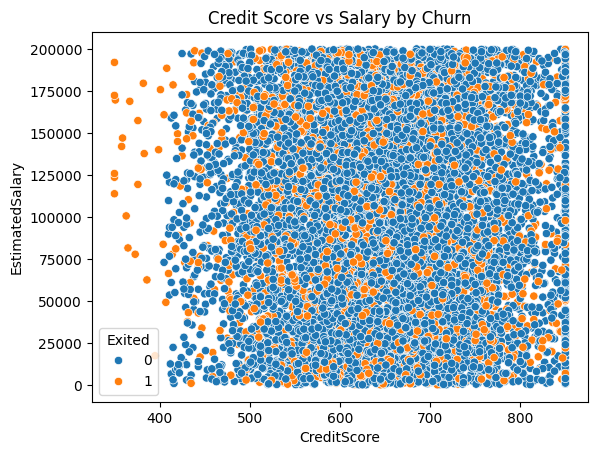

In [ ]:
# Plot Salary vs CreditScore based on Churn
pandas_df = df.select("CreditScore", "EstimatedSalary", "Exited").toPandas()
sns.scatterplot(data=pandas_df, x="CreditScore", y="EstimatedSalary", hue="Exited")
plt.title("Credit Score vs Salary by Churn")
plt.show()


<ipython-input-35-03cc582ef57e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pandas_df, x="Exited", palette="Set2")


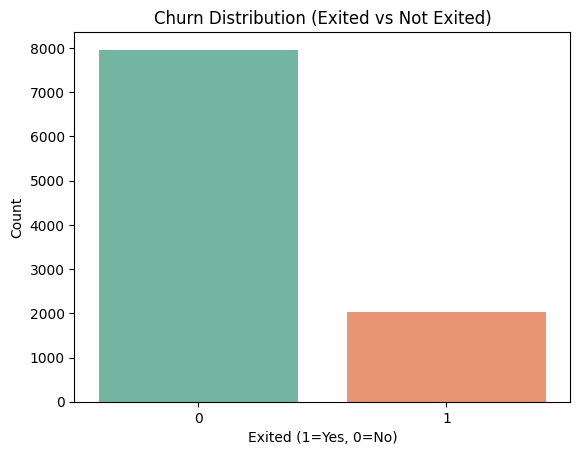

In [ ]:
# Understand how many customers exited vs stayed.
pandas_df = df.select("Exited").toPandas()

# Plot
sns.countplot(data=pandas_df, x="Exited", palette="Set2")
plt.title("Churn Distribution (Exited vs Not Exited)")
plt.xlabel("Exited (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()

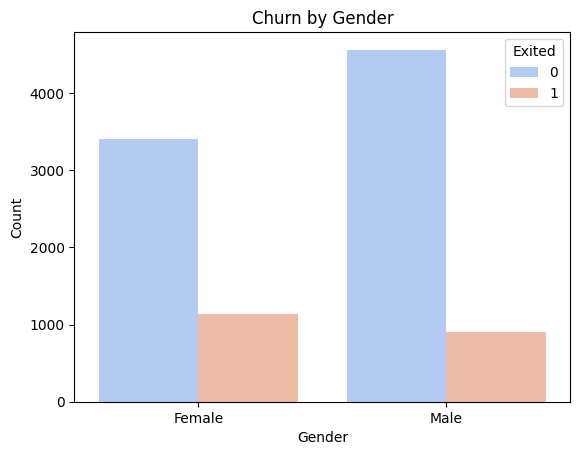

In [ ]:
#  Churn Rate by Gender
# See if males or females are churning more
pandas_df = df.select("Gender", "Exited").toPandas()

# Plot
sns.countplot(data=pandas_df, x="Gender", hue="Exited", palette="coolwarm")
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Exited")
plt.show()

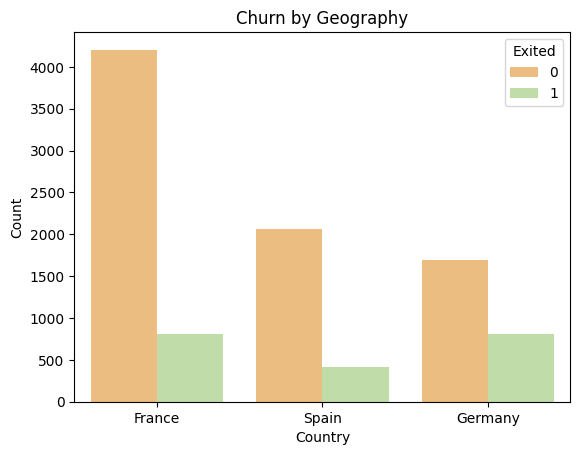

In [ ]:
# Churn Rate by Geography
# Find which country has the highest churn rate.
pandas_df = df.select("Geography", "Exited").toPandas()

sns.countplot(data=pandas_df, x="Geography", hue="Exited", palette="Spectral")
plt.title("Churn by Geography")
plt.xlabel("Country")
plt.ylabel("Count")
plt.legend(title="Exited")
plt.show()


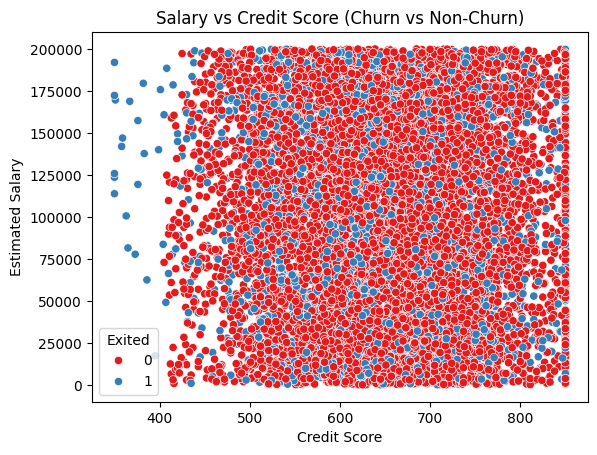

In [ ]:
# Salary vs Credit Score Scatter Plot
# Is there any relationship between Salary and Credit Score?

pandas_df = df.select("EstimatedSalary", "CreditScore", "Exited").toPandas()

sns.scatterplot(data=pandas_df, x="CreditScore", y="EstimatedSalary", hue="Exited", palette="Set1")
plt.title("Salary vs Credit Score (Churn vs Non-Churn)")
plt.xlabel("Credit Score")
plt.ylabel("Estimated Salary")
plt.show()



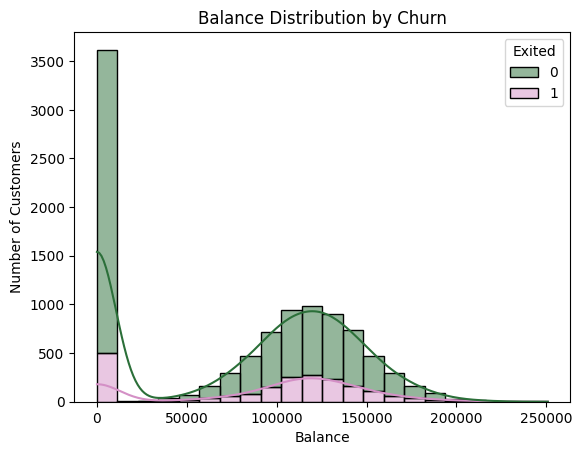

In [ ]:
# Balance Distribution by Churn
#  Are customers with higher balances churning?

pandas_df = df.select("Balance", "Exited").toPandas()

sns.histplot(data=pandas_df, x="Balance", hue="Exited", kde=True, palette="cubehelix", multiple="stack")
plt.title("Balance Distribution by Churn")
plt.xlabel("Balance")
plt.ylabel("Number of Customers")
plt.show()

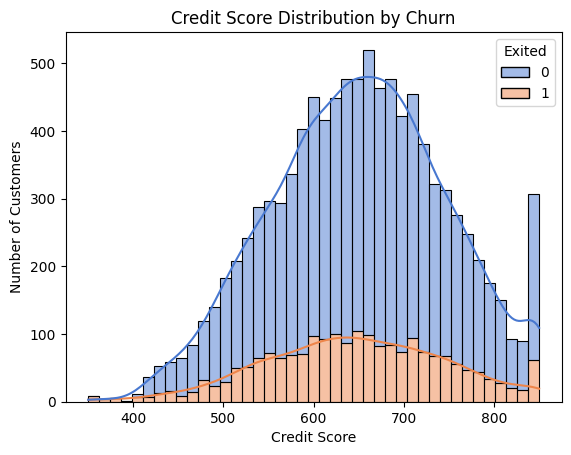

In [ ]:
# Credit Score Distribution (based on Churn)
# Are churners having lower credit scores?

pandas_df = df.select("CreditScore", "Exited").toPandas()

# Plot
sns.histplot(data=pandas_df, x="CreditScore", hue="Exited", kde=True, palette="muted", multiple="stack")
plt.title("Credit Score Distribution by Churn")
plt.xlabel("Credit Score")
plt.ylabel("Number of Customers")
plt.show()